In [223]:
%matplotlib inline
from matplotlib import pyplot as plt
from scipy.integrate import solve_ivp # for reference
import autograd.numpy.random as npr

import autograd.numpy as np
from neuralsolver import NNSolver

import seaborn as sns
from sklearn.metrics import mean_squared_error
from math import sqrt

# Problem Definition

In [230]:
# define ODE problem
# Lotka–Volterra equations

def f(t, y):
    # du/dt = au -buv
    # dv/dt = -cv + dbu*v
    # http://scipy-cookbook.readthedocs.io/items/LoktaVolterraTutorial.html
    a = 1.
    b = 1
    c = 1
    d = 1
    e = 1
    f = 1
    g = 1
    
    X = y[0]
    Y = y[1]
    Z = y[2]
    
    return [a*X - b*X*Y, -c*Y + d*X*Y - e*Y*Z, -f*Z+ g*Y*Z ]

t = np.linspace(0, 10, 200).reshape(-1, 1) #increase training points

y0_list = [0.5, 1,  2] # number of prey and predactor respectively

In [248]:
# define ODE problem
# Lotka–Volterra equations

def f(t, y):
    # du/dt = au -buv
    # dv/dt = -cv + dbu*v
    # http://scipy-cookbook.readthedocs.io/items/LoktaVolterraTutorial.html
    a = 1.
    b = 0.1
    c = 1.5
    d = 0.75
    return [a*y[0] - b*y[0]*y[1], -c*y[1]+d*b*y[0]*y[1]]

t = np.linspace(0, 10, 100).reshape(-1, 1) #increase training points

y0_list = [5, 10] # number of prey and predactor respectively

# Reference solution

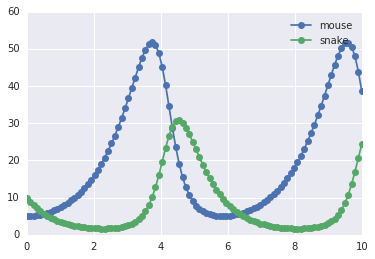

In [250]:
# reference solution using scipy package
sol = solve_ivp(f, [t.min(), t.max()], y0_list, 
                t_eval=t.ravel(), method='Radau', rtol=1e-5)
plt.plot(sol.t, sol.y[0], marker='o', label='mouse')
plt.plot(sol.t, sol.y[1], marker='o', label='snake')
#plt.plot(sol.t, sol.y[2], marker = 'o', label = 'owl')
plt.legend()

In [251]:
res_arr = []
for _ in range(100):
    nn = NNSolver(f, t, y0_list, n_hidden=20)
    nn.reset_weights()
    nn.train(maxiter=500)
    y_pred_list, dydt_pred_list = nn.predict()
    res_arr.append(np.mean([sqrt(mean_squared_error(sol.y[i], y_pred_list[i])) for i in range(2)]))
    

iteration: 0 loss:  3816.45333564
iteration: 200 loss:  1.60703833084
iteration: 400 loss:  0.114212652873
         Current function value: 0.090287
         Iterations: 500
         Function evaluations: 561
         Gradient evaluations: 561
iteration: 0 loss:  205.649789988
iteration: 200 loss:  0.373259497935
iteration: 400 loss:  0.0219281216738
         Current function value: 0.013954
         Iterations: 500
         Function evaluations: 575
         Gradient evaluations: 575
iteration: 0 loss:  368.642222937
iteration: 200 loss:  0.455077561122
iteration: 400 loss:  0.0250342839606
         Current function value: 0.017045
         Iterations: 500
         Function evaluations: 572
         Gradient evaluations: 572
iteration: 0 loss:  47.1989035911
iteration: 200 loss:  0.842239321327
iteration: 400 loss:  0.0168529102567
         Current function value: 0.013037
         Iterations: 500
         Function evaluations: 559
         Gradient evaluations: 559
iteration: 0 loss:

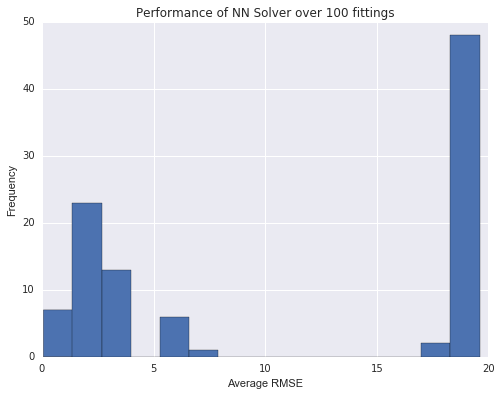

In [253]:
plt.figure(figsize= (8, 6))
plt.hist(res_arr, bins=15)
plt.title('Performance of NN Solver over 100 fittings')
plt.xlabel('Average RMSE')
plt.ylabel('Frequency')

# Neural Net Training

In [204]:
nn = NNSolver(f, t, y0_list, n_hidden=30)
nn

Neural ODE Solver 
Number of equations:       3 
Initial condition y0:      [0.5, 1, 2] 
Numnber of hidden units:   30 
Number of training points: 200 

In [205]:
nn.reset_weights()
%time nn.train(maxiter=500, iprint=100)

iteration: 0 loss:  7729.27139739
iteration: 100 loss:  0.0347408760019
iteration: 200 loss:  0.0265858413502
iteration: 300 loss:  0.0204368707045
iteration: 400 loss:  0.018647234974
         Current function value: 0.016597
         Iterations: 500
         Function evaluations: 580
         Gradient evaluations: 580
CPU times: user 13.2 s, sys: 136 ms, total: 13.4 s
Wall time: 11.2 s


# Verifying training set

In [246]:
nn = NNSolver(f, t, y0_list, n_hidden=20)
nn.reset_weights()
nn.train(maxiter=500, iprint=100)
y_pred_list, dydt_pred_list = nn.predict()

iteration: 0 loss:  3322.55875824
iteration: 100 loss:  0.0364892613683
iteration: 200 loss:  0.0269061062899
iteration: 300 loss:  0.0231863979672
iteration: 400 loss:  0.0179625327003
         Current function value: 0.017180
         Iterations: 500
         Function evaluations: 558
         Gradient evaluations: 558


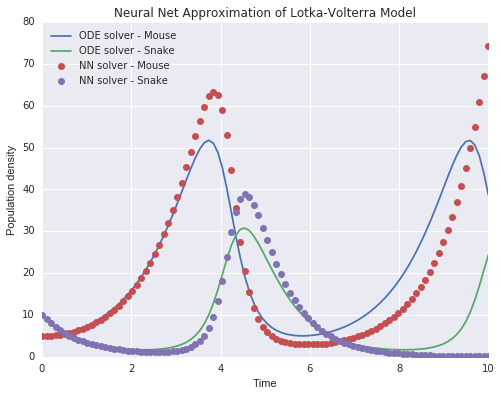

In [256]:
#y_pred_list, dydt_pred_list = nn.predict()
plt.figure(figsize= (8, 6))
# scipy sol
plt.plot(sol.t, sol.y[0], label='ODE solver - Mouse')
plt.plot(sol.t, sol.y[1], label='ODE solver - Snake')
#plt.plot(sol.t, sol.y[2], label='ODE solver - Owl')
# nn soln

plt.plot(t, y_pred_list[0], 'o', label='NN solver - Mouse')


plt.plot(t, y_pred_list[1], 'o', label='NN solver - Snake')


#plt.plot(t, y_pred_list[2], 'o', label='NN - Owl')

plt.legend(loc = "best")
plt.title('Neural Net Approximation of Lotka-Volterra Model')
plt.xlabel('Time')
plt.ylabel('Population density')
#plt.xlim((0, 10.1))

In [258]:
np.mean([sqrt(mean_squared_error(sol.y[i], y_pred_list[i])) for i in range(2)])
#rms = sqrt(mean_squared_error(sol.y[0], y_pred_list[0]))
#sqrt(mean_squared_error(sol.y[1], y_pred_list[1])) + sqrt(mean_squared_error(sol.y[0], y_pred_list[0]))

6.0361076413626726

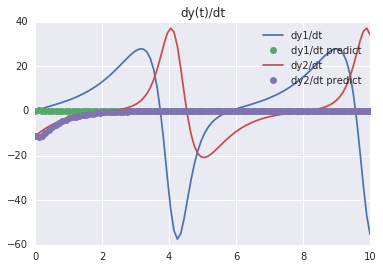

In [63]:
y_pred_list, dydt_pred_list = nn.predict()

plt.plot(sol.t, f(sol.t, sol.y)[0], label='dy1/dt')
plt.plot(t, dydt_pred_list[0], 'o', label='dy1/dt predict')

plt.plot(sol.t, f(sol.t, sol.y)[1], label='dy2/dt')
plt.plot(t, dydt_pred_list[1], 'o', label='dy2/dt predict')

plt.legend()
plt.title('dy(t)/dt')